Imports

In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [0]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

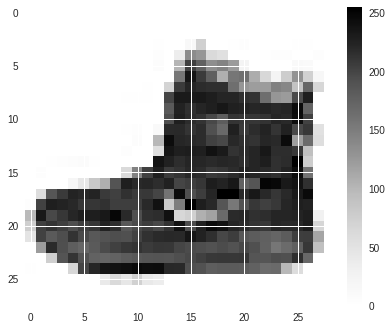

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [0]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [15]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 8s 177us/step - loss: 0.5294 - acc: 0.8137 - val_loss: 0.4203 - val_acc: 0.8474
Epoch 2/5
48000/48000 [==============================] - 8s 168us/step - loss: 0.3975 - acc: 0.8553 - val_loss: 0.3661 - val_acc: 0.8680
Epoch 3/5
48000/48000 [==============================] - 8s 164us/step - loss: 0.3633 - acc: 0.8663 - val_loss: 0.3600 - val_acc: 0.8725
Epoch 4/5
48000/48000 [==============================] - 8s 165us/step - loss: 0.3418 - acc: 0.8742 - val_loss: 0.3381 - val_acc: 0.8784
Epoch 5/5
48000/48000 [==============================] - 8s 161us/step - loss: 0.3206 - acc: 0.8809 - val_loss: 0.3452 - val_acc: 0.8746


Sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [8]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.02590321,  0.05871597,  0.05910954, ...,  0.04766438,
         0.06313969, -0.03132721],
       [-0.01852267, -0.0415465 , -0.00991526, ...,  0.05902757,
         0.01366632,  0.06226666],
       [-0.00163332, -0.00908091, -0.06628204, ...,  0.031507  ,
         0.11495169,  0.05953206],
       ...,
       [ 0.00549325, -0.024757  , -0.02061036, ..., -0.00940946,
        -0.04420717, -0.05237343],
       [-0.05323058,  0.0195864 ,  0.06112908, ...,  0.02321157,
        -0.1629663 , -0.02729129],
       [-0.02526796, -0.05255789,  0.0010385 , ...,  0.12572971,
        -0.16662657,  0.02237526]], dtype=float32)

In [30]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()


[array([[0.45367533, 0.00167579, 0.9743768 , ..., 0.3314218 , 0.0157577 ,
         0.19080772],
        [0.59562016, 0.32525647, 0.88172364, ..., 0.70786786, 0.97653484,
         0.0743237 ],
        [0.45325145, 0.22359298, 0.297432  , ..., 0.64790094, 0.11249291,
         0.63369566],
        ...,
        [0.373962  , 0.7607567 , 0.5149421 , ..., 0.6567949 , 0.43428272,
         0.3893456 ],
        [0.6663189 , 0.66724616, 0.23426563, ..., 0.20366427, 0.7726447 ,
         0.7385384 ],
        [0.94502467, 0.06128937, 0.05347627, ..., 0.2559527 , 0.19751349,
         0.64791155]], dtype=float32),
 array([ 2.17271686e-01, -1.25669604e-02,  4.68343258e-01,  1.04655936e-01,
        -6.26603980e-03,  1.95508763e-01, -2.66720857e-02,  2.33191311e-01,
        -3.46158911e-03,  1.15702555e-01, -8.37793276e-02,  2.18284085e-01,
         8.50701109e-02,  1.02997512e-01,  2.48429880e-01, -1.21037677e-01,
         3.34309250e-01, -1.71739496e-02,  1.15617029e-02,  9.17780846e-02,
         7.333

In [42]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 201us/step - loss: 14.5043 - acc: 0.1001 - val_loss: 14.5143 - val_acc: 0.0995
Epoch 2/5
48000/48000 [==============================] - 9s 189us/step - loss: 14.5043 - acc: 0.1001 - val_loss: 14.5143 - val_acc: 0.0995
Epoch 3/5
48000/48000 [==============================] - 9s 185us/step - loss: 14.5043 - acc: 0.1001 - val_loss: 14.5143 - val_acc: 0.0995
Epoch 4/5
48000/48000 [==============================] - 9s 185us/step - loss: 14.5043 - acc: 0.1001 - val_loss: 14.5143 - val_acc: 0.0995
Epoch 5/5
48000/48000 [==============================] - 9s 190us/step - loss: 14.5043 - acc: 0.1001 - val_loss: 14.5143 - val_acc: 0.0995


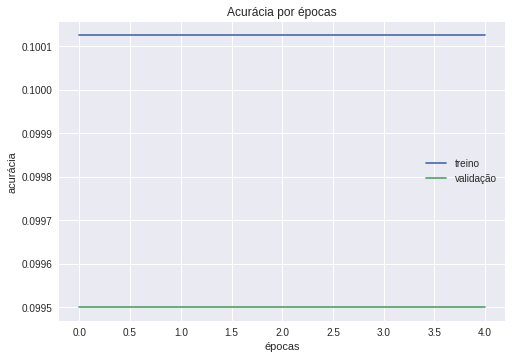

In [43]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


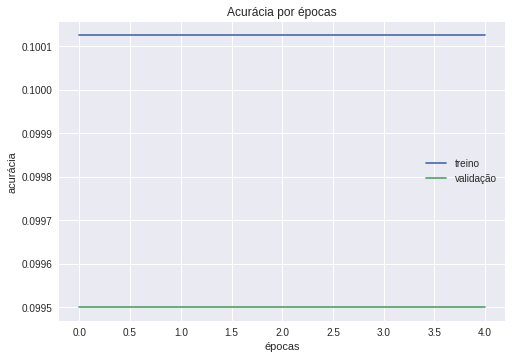

In [32]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [33]:
modelo.get_config()

{'layers': [{'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_1',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'dtype': 'float32', 'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_2',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_1',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    

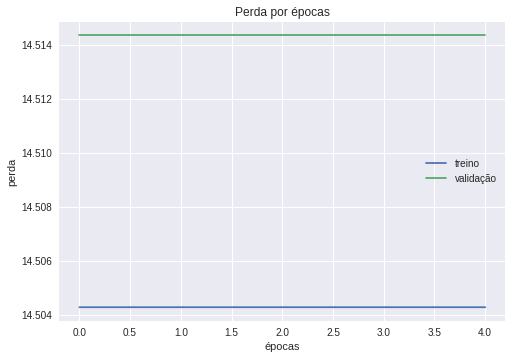

In [44]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [34]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [0]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

Salvando e carregando o modelo treinado

In [0]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

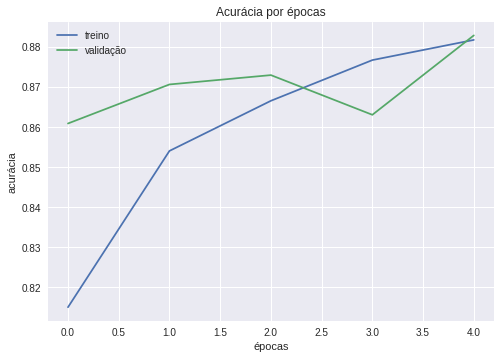

In [11]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

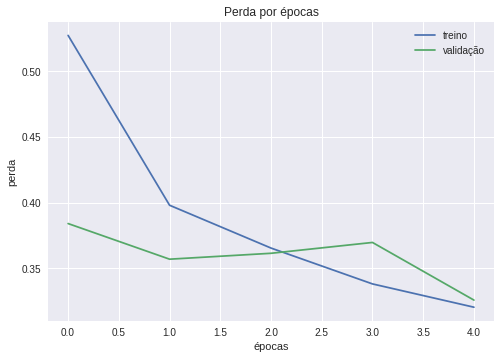

In [12]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [13]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [14]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

10000/10000 [==============================] - 0s 36us/step
Perda do teste: 2.180157678174971
Acurácia do teste: 0.8623
